# Basic Graph Algorithms (Lesson/Unit 3)

In [ ]:
# 6.1 Initial Foray

    # Nodes = Vertices = Dots = n
    # Edges = Links = Segment = m
    # Region = Area = r لا تنسى المنطقة خارج الشكل تعتبر منطقة واحدة

# Go to Quiz ()
    # [1]
        # n = 6
        # m = 6
        # r = 2

In [ ]:
# 6.2 Properties of Social Networks خصائص التواصل الاجتماعية

    # Properties of Socral Networks
        # Just gruphs, but real-world networks
        # have Some drstinctne properhes (walts & cthers)

        # - "Small worlts" (shart Raths)
        # - "Cliquish" (high clustering coefficients)

# Go to Quiz (Degree (D) & Paths (P) in Graphs?)
    # 1. Clique        >>> Degree = Θ(n)    >>> Paths = Θ(1) 
    # 2. Ring          >>> Degree = Θ(1)    >>> Paths = Θ(n)
    # 3. Balanced Tree >>> Degree = Θ(1)    >>> Paths = Θ(logn)
    # 4. Hypercube     >>> Degree = Θ(logn) >>> Paths = Θ(logn)

CC(V) = 0.1667


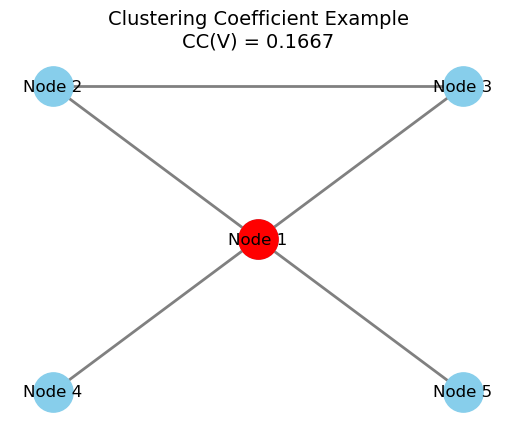

In [13]:
# 6.3 Clustering Coefficient معامل التجميع

    # Clustering Coefficient - CC(V)
    # CC(V) = 2Nv/Kv(Kv−1) 
        # يتراوح معامل التجميع بين 0 (لا توجد روابط بين الجيران) و1 (جميع الجيران متصلون)
        # v  = a node
        # Nv = درجة العقدة (عدد الجيران)
        # Kv = عدد الروابط الفعلية بين الجيران

# حساب معامل التجميع
def clustering_coefficient(Kv, Nv):
    """
    حساب معامل التجميع للعقدة V.
    
    المعاملات:
        Kv (int): درجة العقدة (عدد الجيران).
        Nv (int): عدد الروابط بين الجيران.
    
    الإرجاع:
        float: قيمة معامل التجميع.
    """
    if Kv < 2:
        return 0.0  # لا يوجد جيران كافيين للربط
    max_possible_links = Kv * (Kv - 1) / 2
    return (2 * Nv) / (Kv * (Kv - 1)) if max_possible_links != 0 else 0.0

# مثال من الشكل:
Kv = 4
Nv = 1
cc = clustering_coefficient(Kv, Nv)
print(f"CC(V) = {cc:.4f}")  # المخرجات: CC(V) = 0.1667

# كود رسم الشكل
import networkx as nx
import matplotlib.pyplot as plt

# إنشاء الشبكة المذكورة في المثال
G = nx.Graph()
edges = [
    (1, 2), (1, 3), (1, 4), (1, 5), # روابط العقدة V (العقدة 1)
    (2, 3) # الرابط الوحيد بين الجيران
]
G.add_edges_from(edges)

# حساب معامل التجميع للعقدة V (العقدة 1)
Kv = 4
Nv = 1
CC_V = (2 * Nv) / (Kv * (Kv - 1)) 

# إعداد تخطيط الرسم
pos = {
    1: (0, 0),       # العقدة V في المنتصف
    2: (-1, 1),      # جار 1
    3: (1, 1),       # جار 2
    4: (-1, -1),     # جار 3
    5: (1, -1)       # جار 4
}

# رسم العقد والروبط
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray")

# تمييز العقدة V باللون الأحمر
nx.draw_networkx_nodes(G, pos, nodelist=[1], node_color="red", node_size=800)

# إضافة التسميات
labels = {node: f"Node {node}" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# إضافة عنوان وتوضيح معامل التجميع
plt.title(f"Clustering Coefficient Example\nCC(V) = {CC_V:.4f}", fontsize=14)
plt.axis("off") # إخفاء المحاور

# عرض الرسم
plt.show()

In [5]:
# 6.4 Clustering Coefficient Quiz مسئلة معامل التجميع

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

flights = [("ORD", "SEA"), ("ORD", "LAX"), ('ORD', 'DFW'), ('ORD', 'PIT'),
           ('SEA', 'LAX'), ('LAX', 'DFW'), ('ATL', 'PIT'), ('ATL', 'RDU'),
           ('RDU', 'PHL'), ('PIT', 'PHL'), ('PHL', 'PVD')]

G = {}
for (x,y) in flights: make_link(G,x,y)

def clustering_coefficient(G,v):
    neighbors = G[v].keys()
    if len(neighbors) == 1: return -1.0
    links = 0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

print(clustering_coefficient(G,"ORD"))

total = 0
for v in G.keys():
    total += clustering_coefficient(G,v)

print(total/len(G))

# Go to Quiz ()
    # 

0.3333333333333333
0.2222222222222222


In [25]:
# 6.5 Clustering Coefficient Code كود معامل التجميع

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

flights = [("ORD", "SEA"), ("ORD", "LAX"), ('ORD', 'DFW'), ('ORD', 'PIT'),
           ('SEA', 'LAX'), ('LAX', 'DFW'), ('ATL', 'PIT'), ('ATL', 'RDU'),
           ('RDU', 'PHL'), ('PIT', 'PHL'), ('PHL', 'PVD')]

G = {}
for (x,y) in flights: make_link(G,x,y)

def clustering_coefficient(G,v):
    neighbors = G[v].keys()
    if len(neighbors) == 1: return -1.0
    links = 0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

print(clustering_coefficient(G,"ORD"))

total = 0
for v in G.keys():
    total += clustering_coefficient(G,v)

print(total/len(G))

0.3333333333333333
0.2222222222222222


In [3]:
# 6.6 Connected Components المكونات المتصلة

    # Connected Components
        # - is everything connected?
        # - is a set of nodes isolated?
        # - can all nodes commoniacte?

# Go to Quiz (How many discounted components?)
    # [2]

In [1]:
# 6.7 Connected Components Code كود المكونات المتصلة
      
def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

connections = [("a", "g"), ("a", "d"), ('d', 'g'), ('g', 'c'),
           ('b', 'f'), ('f', 'e'), ('e', 'h')]

G = {}
for (x,y) in connections: make_link(G,x,y)

# Traversal ...
# Call this routine on nodes being visited for the first time
def mark_component(G, node, marked):
    marked[node] = True
    total_marked = 1
    for neighbor in G[node]:
        if neighbor not in marked:
            total_marked += mark_component(G, neighbor, marked)
    return total_marked
    
def list_component_sizes(G):
    marked = {}
    for node in G.keys():
        if node not in marked:
            print("Component containing", node, ": ", mark_component(G, node, marked))

list_component_sizes(G)

Component containing a :  4
Component containing b :  4


In [23]:
# 6.8 Running Time of Connected Component

    # Ruming Time of Connected Component Countinq
    # Depth First Search    >>> Θ(n+m)
    # Brealth First Search  >>> 

In [49]:
# 6.9 Checking Pairwise Connectivity التحقق من الاتصال الزوجي

##################################################################
# Traversal...
# Call this routine on nodes being visited for the first time
def mark_component(G, node, marked):
    marked[node] = True
    total_marked = 1
    for neighbor in G[node]:
        if neighbor not in marked:
            total_marked += mark_component(G, neighbor, marked)
    return total_marked

def check_connection(G, v1, v2):
    # التحقق من وجود العقدتين في الرسم البياني
    if v1 not in G or v2 not in G:
        return False
    
    marked = {}  # لتتبع العقد المميزة
    mark_component(G, v1, marked)  # تمييز المكون المتصل بـ v1
    
    # التحقق مما إذا كانت v2 ضمن العقد المميزة
    return v2 in marked

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def test():
    edges = [
        ('a', 'g'), ('a', 'd'), ('g', 'c'), ('g', 'd'), 
        ('b', 'f'), ('f', 'e'), ('e', 'h')
    ]
    G = {}
    for v1, v2 in edges:
        make_link(G, v1, v2)
    
    # اختبار الاتصال بين العقد
    assert check_connection(G, "a", "c") == True, "يجب أن تكون 'a' متصلة بـ 'c'"
    assert check_connection(G, 'a', 'b') == False, "لا يجب أن تكون 'a' متصلة بـ 'b'"
    
    print("All tests passed! ✅")

test()

All tests passed! ✅


In [ ]:
# 6.10 Pairwise Shortest Path أقصر مسار زوجي

    # https://learn.udacity.com/courses/cs215/lessons/fef6ba62-56b7-4807-8171-42b5ba65dc0b/concepts/82c7bb50-107c-4e3b-83de-32a8f9d62cac?1340145769812=5&lesson_tab=lesson


In [ ]:
# 6.11 Depth vs Breadth First Search البحث بالعمق مقابل البحث بالعرض أولاً

    # Breadth First Search (BFS) 
    # is more effective than Depth First Search (DFS) 
    # for finding the shortest paths in a graph, as BFS 
    # explores nodes layer by layer, while DFS dives deep into 
    # the graph, potentially leading to longer paths.

    # That code will check deep and deep:
    # check_connection(G, 'i', 'n')
        # check_connection(G, 'i', marked)
            # check_connection(G, 'j', marked)
                # check_connection(G, 'k', marked)
                    # check_connection(G, 'l', marked)

In [ ]:
# 6.12 Recursion Replacement استبدال التكرار

    # Deepth First without Recursion
    # Open List: 

In [ ]:
# 6.13 (Depth) First without Recursion العمق أولاً بدون تكرار
 
    #  - Grab (last) elemnt of open list.
    #  - make any unmarked neighbrs and add to open list.
    #  - reoeat until nothing open.

# Go to Quiz ()
    # a + g = [12]
        # a = 7 / 5 
        # b = 6 / 4
        # c = 2 / 3
        # d = 1 / 1 (Open List)
        # e = 3 / 2
        # f = 4 / 6
        # g = 5 / 7

In [ ]:
# 6.14 (Breadth) First without Recursion العرض أولاً دون تكرار
 
    #  - Grab (first) elemnt of open list.
    #  - make any unmarked neighbrs and add to open list.
    #  - reoeat until nothing open.

# Go to Quiz ()
    # a + g = [12]
        # a = 7 
        # b = 5
        # c = 3
        # d = 1 (Open List)
        # e = 2
        # f = 4
        # g = 6

In [ ]:
# 6.15 Searching a Tree البحث عن شجرة

    # 

# Go to Quiz ()
    # o = [8]

In [ ]:
# 6.16 Marvel "Social" Network شبكة مارفل الاجتماعية



In [25]:
# 6.17 Breadth First Search BFS Code

     # Applications of BFS
         # Shortest path finding in unweighted graphs
         # Web crawling
         # Social network analysis
         # Finding connected components
         # Puzzle solving (e.g., Rubik's cube)
         # GPS navigation systems

#!/usr/bin/python
import csv
import os

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def read_graph(filename):
    if not os.path.exists(filename):
        print(f"خطأ: الملف {filename} غير موجود!")
        return {}
    
    csv_reader = csv.reader(open(filename), delimiter='\t')
    G = {}
    line_count = 0
    
    for row in csv_reader:
        if len(row) >= 2:
            node1, node2 = row[0].strip(), row[1].strip()
            if node1 and node2:  # تأكد أن الأسماء غير فارغة
                make_link(G, node1, node2)
                line_count += 1
    
    if line_count == 0:
        print("تحذير: الملف لا يحتوي على بيانات صالحة")
    return G

def path(G, v1, v2):
    if v1 not in G or v2 not in G:
        print(f"تحذير: إحدى العقدتين {v1} أو {v2} غير موجودة في الرسم البياني")
        return False
    
    distance_from_start = {}
    open_list = [v1]
    distance_from_start[v1] = 0
    
    while open_list:
        current = open_list.pop(0)
        
        for neighbor in G[current]:
            if neighbor not in distance_from_start:
                distance_from_start[neighbor] = distance_from_start[current] + 1
                if neighbor == v2:
                    return distance_from_start[v2]
                open_list.append(neighbor)
    
    return False

# الخطوة 1: قراءة الرسم البياني
marvelG = read_graph("uniq_edges.csv")

# الخطوة 2: التحقق من العقد المتاحة
if marvelG:
    print("أول 10 عقد متاحة:", list(marvelG.keys())[:10])
    
    # الخطوة 3: اختبار البحث باستخدام عقد موجودة فعلاً
    available_nodes = list(marvelG.keys())
    if len(available_nodes) >= 2:
        from_node = available_nodes[0]
        to_node = available_nodes[1]
        print(f"\nالبحث عن المسار من {from_node} إلى {to_node}")
        result = path(marvelG, from_node, to_node)
        print("النتيجة:", result)
    else:
        print("لا توجد عقد كافية لإجراء البحث")
else:
    print("لا يمكن تنفيذ البحث بسبب مشكلة في البيانات")

تحذير: الملف لا يحتوي على بيانات صالحة
لا يمكن تنفيذ البحث بسبب مشكلة في البيانات


In [27]:
# 6.18 Single Source Shortest Paths أقصر مسارات المصدر الواحد

    # Find "central" nodes.
    # How central is v1?
        # avrage shorest path length to all nodes

    # Shortest path length V1 to V2: Θ(n+m)
    # naively: repeat for all nodes: Θ(n(n+m)) = Θ(n^2+nm)

# Go to Quiz (How can we find all distances from v1 to the rest of the graph faster?)
    # 3. Θ(n+m)

In [ ]:
# 6.19 Centrality المركزية

    # Note that this notion of centrality really only 
    # makes sense with respect to a connected set of 
    # nodes. If the graph is disconnected, 
    # it can return weird answers. (MLL)

In [ ]:
# 6.20 Bridge Edges حواف الجسور

    # the weak edges

    # 1. write gragp as a tree
    # 2. "post" order nodes 

# Go to Quiz ()
    # [6]

In [ ]:
# 6.21 Finding Bridge Edges ايجاد حواف الجسور

    # 1. write gragp as a tree
    # 2. "post" order nodes 
    # 3. compute ND-green edges only
        # L-lowest: green/one red
        # H-highest: green/one red
    # 4. Bridge edge: green and
        # #green <= # and
        # #red >= #

In [ ]:
# 6.22 Proof إثبات

    # No non tree edge is a bridge (must be green, not red)

In [ ]:
# Done (6)
# Lesson Rating
# You just completed (6)
# How was it? ()
# Suggested Improvements: 